# Drug Related Overdose Deaths
## Individual Project- Regression
### Natasha Rivers
#### July 14, 2021

<hr style="border:1px solid black"> </hr>

## Project Scope

**Methodology Used**: Regression

**Target Variable**: Age

**Primary Question**: Does average age play a role in drug related deaths?

<hr style="border:3px solid black"> </hr>

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import acquire
import prepare
import explore

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, explained_variance_score

## Acquire

In [2]:
df = pd.read_csv('drug_deaths.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

### Takeaways from Acquire:
- imported the csv into Pandas and created a dataframe
- original dataframe contains:
    - 41 columns 
        - multiple data types
    - 5105 entries
- will likely need to:
    - drop some columns
    - rename columns
    - change data types
- dummies already appear to have been created
- contains many nulls

<hr style="border:2px solid black"> </hr>

## Prepare

In [5]:
df.shape

(5105, 42)

In [6]:
# replace nan values (resulting in no loss of entries)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [7]:
df.shape

(5105, 42)

In [8]:
#check for nulls
df.isnull().sum()

Unnamed: 0                0
ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
Fentanyl_Analogue         0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other               

In [9]:
df = df.drop(columns=['Unnamed: 0', 'DateType', 'ResidenceCounty','ResidenceState', 'DeathCounty', 'InjuryCounty','InjuryState', 'ResidenceCityGeo', 'InjuryCityGeo', 'Other', 'OtherSignifican', 'LocationifOther', 'DeathCityGeo', 'InjuryCity'])  

In [10]:
df.isnull().sum()

ID                       0
Date                     2
Age                      3
Sex                      6
Race                    13
ResidenceCity          173
DeathCity                5
Location                24
DescriptionofInjury    780
InjuryPlace             66
COD                      0
Heroin                   0
Cocaine                  0
Fentanyl                 0
Fentanyl_Analogue        0
Oxycodone                0
Oxymorphone              0
Ethanol                  0
Hydrocodone              0
Benzodiazepine           0
Methadone                0
Amphet                   0
Tramad                   0
Morphine_NotHeroin       0
Hydromorphone            0
OpiateNOS                0
AnyOpioid                0
MannerofDeath           10
dtype: int64

In [11]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,InjuryPlace,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,14-0273,06/28/2014 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,...,1,1,0,0,0,0,0,0,0,Accident
1,13-0102,03/21/2013 12:00:00 AM,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,03/13/2016 12:00:00 AM,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,Substance Abuse,Unknown,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,03/31/2016 12:00:00 AM,23.0,Male,White,RYE,GREENWICH,Hospital,substance abuse,Residence,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,02/13/2013 12:00:00 AM,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,Transdermal Absorption,Other,...,0,0,0,0,0,0,0,0,0,Accident


In [12]:
df.shape

(5105, 28)

In [13]:
#deal with null values left
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    ''' 
    take in a dataframe and a proportion for columns and rows
    return dataframe with columns and rows not meeting proportions dropped
    '''
    # calc column threshold
    col_thresh = int(round(prop_required_column*df.shape[0],0)) 
    # drop columns with non-nulls less than threshold
    df.dropna(axis=1, thresh=col_thresh, inplace=True) 
    # calc row threshhold
    row_thresh = int(round(prop_required_row*df.shape[1],0))  
    # drop columns with non-nulls less than threshold
    df.dropna(axis=0, thresh=row_thresh, inplace=True) 
    
    return df 

In [14]:
from sklearn.impute import SimpleImputer

def impute(df, my_strategy, column_list):
    ''' 
    take in a df strategy and cloumn list
    return df with listed columns imputed using input stratagy
    '''
    #create imputer   
    imputer = SimpleImputer(strategy=my_strategy)
    #fit/transform selected columns
    df[column_list] = imputer.fit_transform(df[column_list])

    return df

In [15]:
#drop using threshold
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .5)

#impute with mean for numeric column
df = impute(df, 'mean', ['Age'])

#imputing with most frequent value for descrete columns
df = impute(df, 'most_frequent', ['Date', 'Sex', 'Race','ResidenceCity', 'DeathCity', 'Location', 'DescriptionofInjury', 'InjuryPlace', 'MannerofDeath']) 

In [16]:
#confirm all nulls gone
df.isnull().sum()

ID                     0
Date                   0
Age                    0
Sex                    0
Race                   0
ResidenceCity          0
DeathCity              0
Location               0
DescriptionofInjury    0
InjuryPlace            0
COD                    0
Heroin                 0
Cocaine                0
Fentanyl               0
Fentanyl_Analogue      0
Oxycodone              0
Oxymorphone            0
Ethanol                0
Hydrocodone            0
Benzodiazepine         0
Methadone              0
Amphet                 0
Tramad                 0
Morphine_NotHeroin     0
Hydromorphone          0
OpiateNOS              0
AnyOpioid              0
MannerofDeath          0
dtype: int64

In [17]:
#need to change 'accident' to be be uniform
df.MannerofDeath.value_counts()

Accident    5076
Pending       14
accident      13
Natural        1
ACCIDENT       1
Name: MannerofDeath, dtype: int64

In [18]:
#change ACCIDENT to Accident for uniformity
df = df.replace({'MannerofDeath': 'ACCIDENT'}, {'MannerofDeath': 'Accident'})
#change accident to Accident for uniformity
df = df.replace({'MannerofDeath': 'accident'}, {'MannerofDeath': 'Accident'})

In [19]:
#take a look, make sure it worked
df.MannerofDeath.value_counts()

Accident    5090
Pending       14
Natural        1
Name: MannerofDeath, dtype: int64

In [20]:
df.Race.value_counts()

White                     4017
Hispanic, White            561
Black                      433
Hispanic, Black             24
Unknown                     23
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

In [21]:
#change race options
df = df.replace({'Race': 'Asian, Other'}, {'Race': 'Other'})
df = df.replace({'Race': 'Asian Indian'}, {'Race': 'Other'})   
df = df.replace({'Race': 'Chinese'}, {'Race': 'Other'}) 
df = df.replace({'Race': 'Native American, Other'}, {'Race': 'Other'})
df = df.replace({'Race': 'Hawaiian'}, {'Race': 'Other'}) 
df = df.replace({'Race': 'Hispanic, White'}, {'Race': 'Hispanic'}) 
df = df.replace({'Race': 'Hispanic, Black'}, {'Race': 'Hispanic'}) 

In [22]:
df.Race.value_counts()

White       4017
Hispanic     585
Black        433
Other         47
Unknown       23
Name: Race, dtype: int64

<AxesSubplot:>

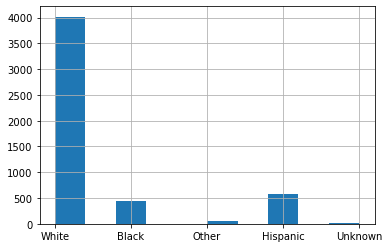

In [23]:
df.Race.hist()

In [24]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,InjuryPlace,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
0,14-0273,06/28/2014 12:00:00 AM,41.964916,Male,White,HARTFORD,HARTFORD,Residence,substance,Residence,...,1,1,0,0,0,0,0,0,0,Accident
1,13-0102,03/21/2013 12:00:00 AM,48.000000,Male,Black,NORWALK,NORWALK,Hospital,Substance Abuse,Residence,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,03/13/2016 12:00:00 AM,30.000000,Female,White,SANDY HOOK,DANBURY,Hospital,Substance Abuse,Unknown,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,03/31/2016 12:00:00 AM,23.000000,Male,White,RYE,GREENWICH,Hospital,substance abuse,Residence,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,02/13/2013 12:00:00 AM,22.000000,Male,Other,FLUSHING,GREENWICH,Hospital,Transdermal Absorption,Other,...,0,0,0,0,0,0,0,0,0,Accident


In [25]:
#change datatype
df.Age = df.Age.astype(int)

In [26]:
#encode Race using dummy columns
od_dummies = pd.get_dummies(df.Race, drop_first=True)
# join dummy columns back to df
df = pd.concat([df, od_dummies], axis=1)

In [27]:
#see what is most correlated
corr = df.corr()
corr

,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,Hispanic,Other,Unknown,White
Age,1.000000,-0.128856,0.045471,-0.019466,0.121200,0.028573,0.085530,0.073067,0.059161,0.061733,-0.042368,0.085369,0.043209,0.029307,0.016998,-0.044627,-0.014511,-0.077570
Heroin,-0.128856,1.000000,-0.002140,-0.009908,-0.224786,-0.112995,-0.025313,-0.087231,-0.104391,-0.125301,-0.003988,-0.038304,-0.002160,-0.131226,0.033447,0.002939,0.015245,0.018170
Cocaine,0.045471,-0.002140,1.000000,0.038905,-0.116250,-0.063032,-0.044395,-0.060304,-0.127564,-0.062315,0.004012,-0.040055,-0.021159,-0.056662,0.048007,0.013438,-0.005453,-0.150437
Fentanyl_Analogue,-0.019466,-0.009908,0.038905,1.000000,-0.053041,-0.037092,0.006837,-0.024525,0.007820,-0.028285,0.025009,0.005127,-0.009571,-0.038037,0.014888,0.010966,0.002727,-0.029017
Oxycodone,0.121200,-0.224786,-0.116250,-0.053041,1.000000,0.320290,0.005251,0.048206,0.136506,-0.040371,-0.006639,0.005926,0.034915,0.030393,-0.039060,-0.022738,0.002397,0.059655
Oxymorphone,0.028573,-0.112995,-0.063032,-0.037092,0.320290,1.000000,0.001961,-0.004497,0.066741,-0.004821,0.004986,-0.006483,0.009186,-0.009012,-0.035795,-0.014172,0.030761,0.053242
Ethanol,0.085530,-0.025313,-0.044395,0.006837,0.005251,0.001961,1.000000,0.033909,-0.004199,-0.037363,-0.031072,0.003603,-0.026821,-0.012245,-0.022755,-0.002295,0.009407,-0.005827
Hydrocodone,0.073067,-0.087231,-0.060304,-0.024525,0.048206,-0.004497,0.033909,1.000000,0.035401,-0.031246,-0.012571,-0.000041,0.007883,0.019690,-0.026691,0.012470,-0.010348,0.035489
Benzodiazepine,0.059161,-0.104391,-0.127564,0.007820,0.136506,0.066741,-0.004199,0.035401,1.000000,0.112367,0.056782,0.038973,0.028189,0.030248,-0.083661,-0.011014,-0.013623,0.141475
Methadone,0.061733,-0.125301,-0.062315,-0.028285,-0.040371,-0.004821,-0.037363,-0.031246,0.112367,1.000000,-0.014622,-0.004587,-0.003106,-0.016443,-0.002791,-0.030840,-0.011444,0.037943


In [81]:
#split data using od_deaths_split function from prepare file
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.od_deaths_split(df, 'Age')

train -> (2858, 33)
validate -> (1226, 33)
test -> (1021, 33)


### Takeaways from Prepare:
- dropped several columns with high null value 
    - were not significant if only had ~10% of data
- filled null values by imputing
    - using mean and most frequent
- changed data for uniformity in Manner of Death
- changed data type in Age from float to integer
- Split data into train, validate, test using Age as the target

<hr style="border:2px solid black"> </hr>

# Explore

## Univariate Exploration

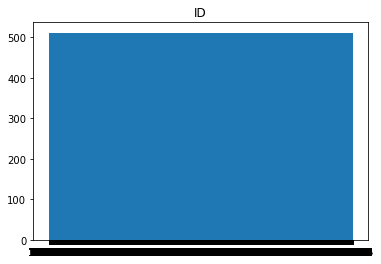

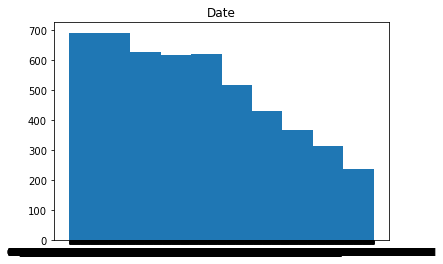

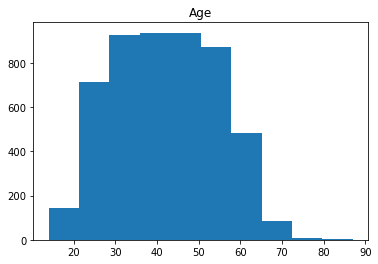

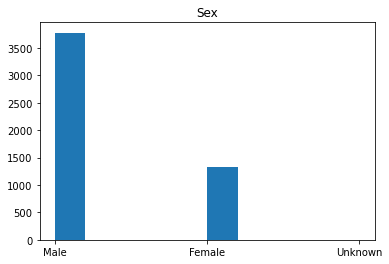

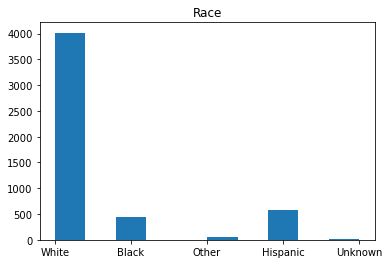

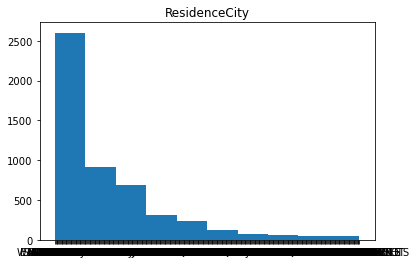

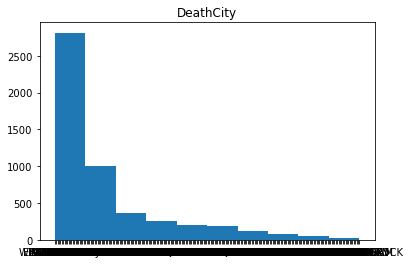

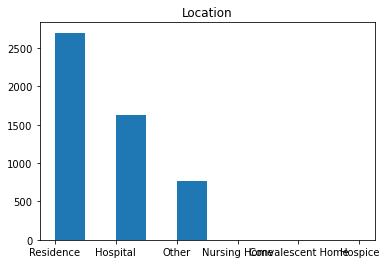

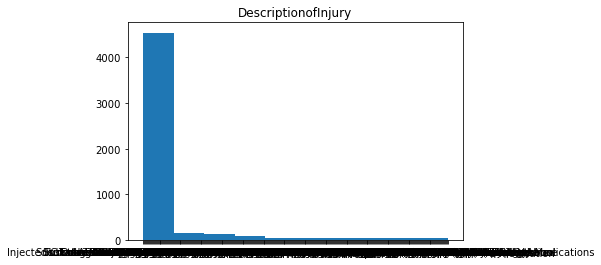

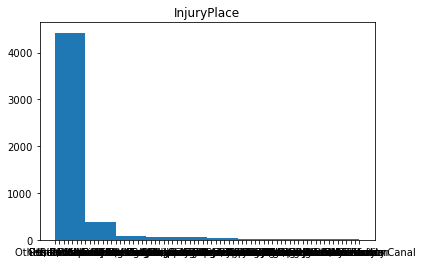

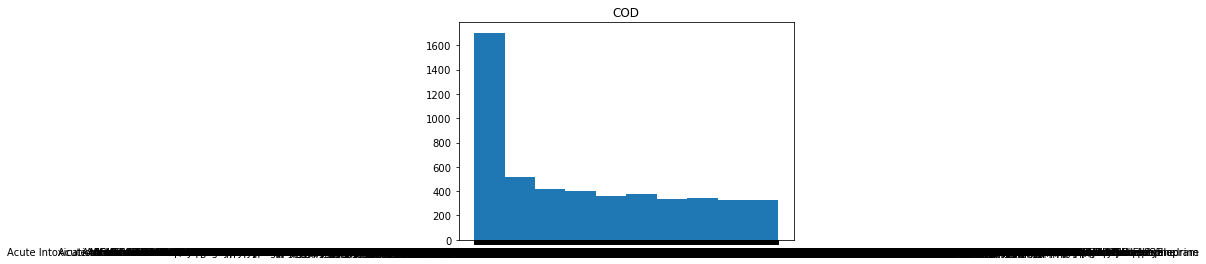

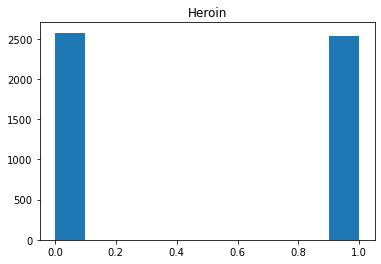

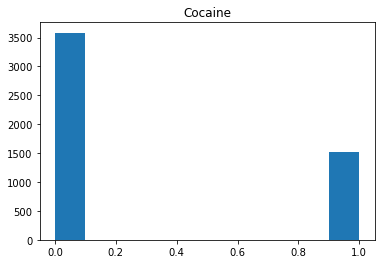

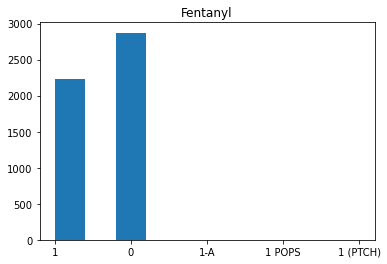

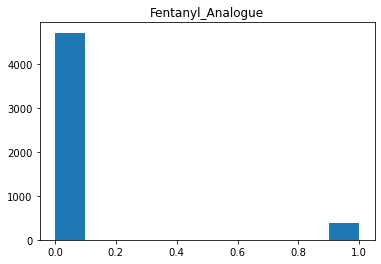

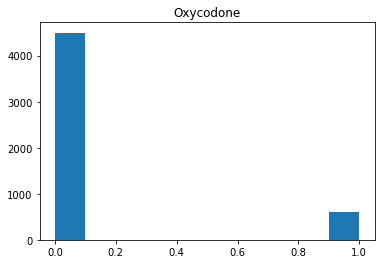

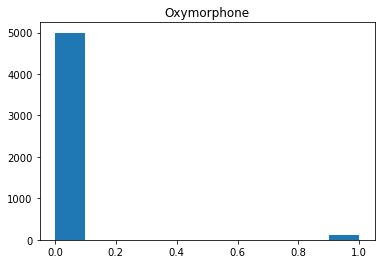

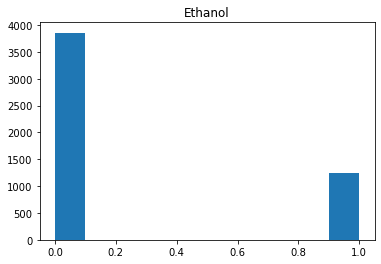

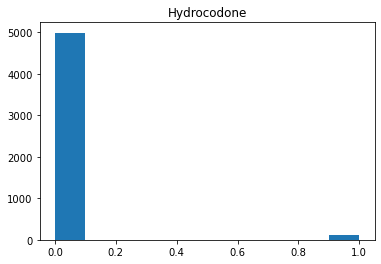

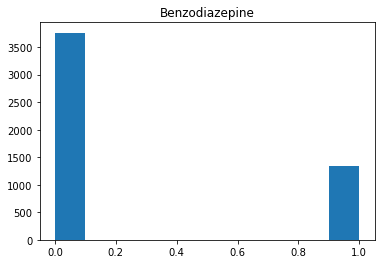

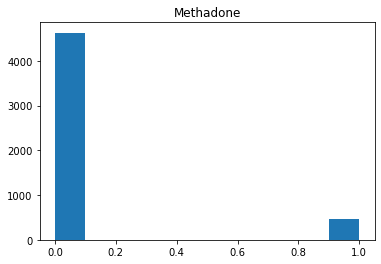

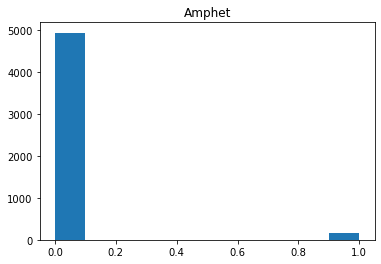

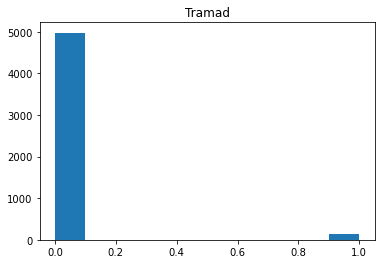

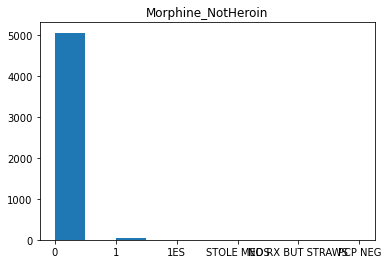

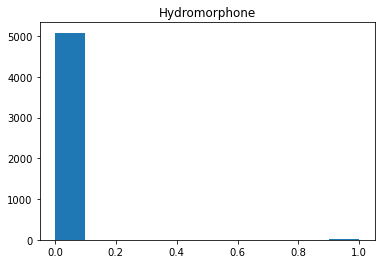

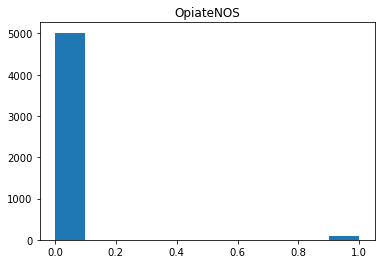

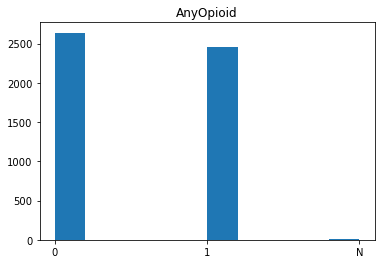

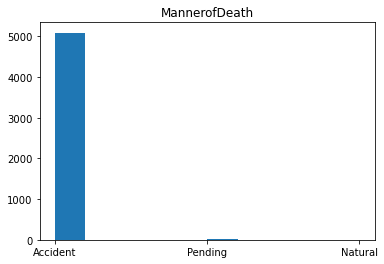

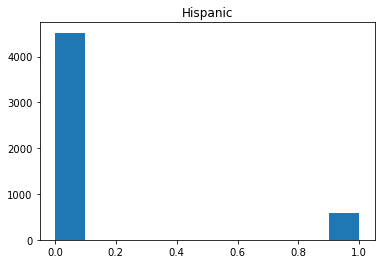

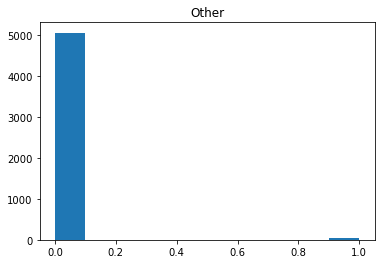

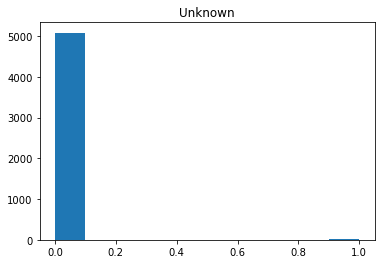

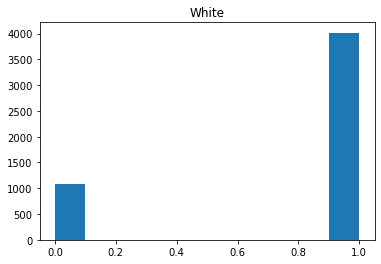

In [29]:
#visualize distribution
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

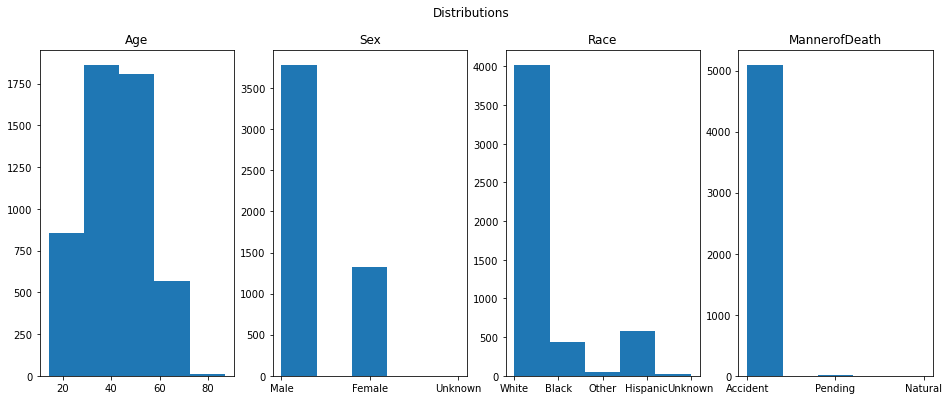

In [30]:
# Plot the distributions
plt.figure(figsize=(16, 6))

# List of columns
cols = ['Age', 'Sex', 'Race', 'MannerofDeath']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    plt.suptitle('Distributions')


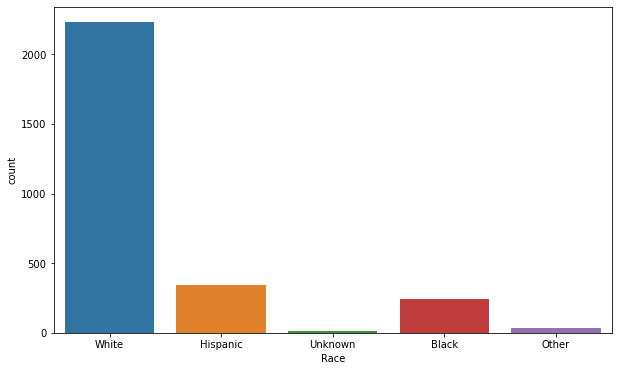

In [31]:
#visualize Race data using a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Race', data=train)
plt.show()

### Bivariate Exploration

Text(0.5, 1.0, 'Average Age by Race')

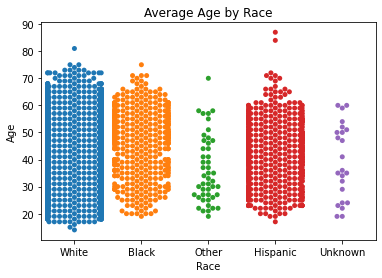

In [32]:
sns.swarmplot(x= df.Race, y = df.Age)
plt.title('Average Age by Race')

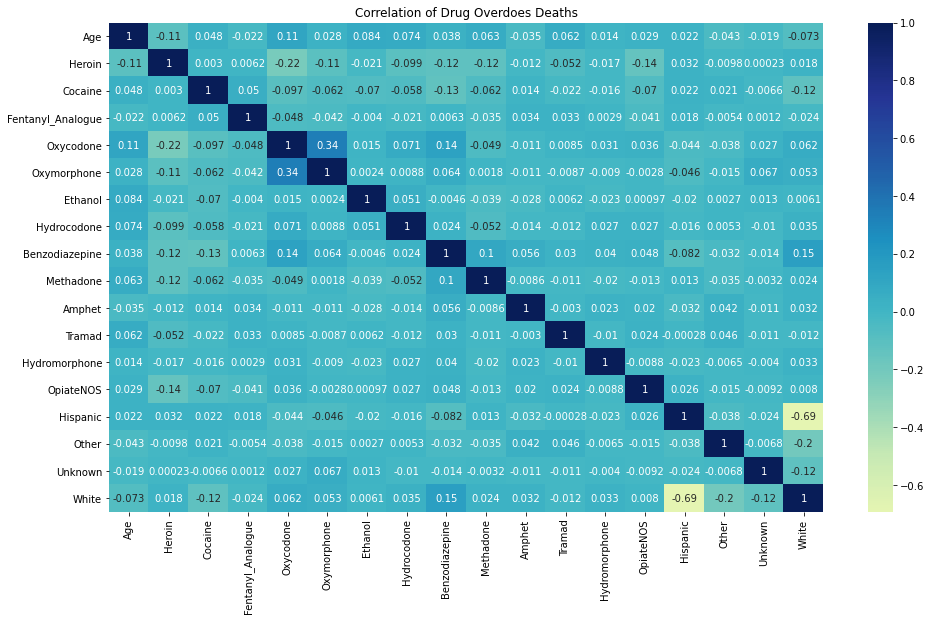

In [33]:
#heatmap to show correlation of all data
plt.figure(figsize=(16,9))

sns.heatmap(train.corr(), cmap='YlGnBu', center=0, annot=True)

plt.title('Correlation of Drug Overdoes Deaths')

plt.show()

In [34]:
#find correlation with target variable only
od_corr = train.corr()
final_corr = od_corr['Age'].sort_values(ascending=False)
final_corr

Age                  1.000000
Oxycodone            0.111364
Ethanol              0.083992
Hydrocodone          0.074245
Methadone            0.063260
Tramad               0.061657
Cocaine              0.047652
Benzodiazepine       0.038018
OpiateNOS            0.029322
Oxymorphone          0.027834
Hispanic             0.021580
Hydromorphone        0.014319
Unknown             -0.018962
Fentanyl_Analogue   -0.021837
Amphet              -0.035244
Other               -0.042538
White               -0.073179
Heroin              -0.108195
Name: Age, dtype: float64

In [35]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,InjuryPlace,...,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,Hispanic,Other,Unknown,White
0,14-0273,06/28/2014 12:00:00 AM,41,Male,White,HARTFORD,HARTFORD,Residence,substance,Residence,...,0,0,0,0,0,Accident,0,0,0,1
1,13-0102,03/21/2013 12:00:00 AM,48,Male,Black,NORWALK,NORWALK,Hospital,Substance Abuse,Residence,...,0,0,0,0,0,Accident,0,0,0,0
2,16-0165,03/13/2016 12:00:00 AM,30,Female,White,SANDY HOOK,DANBURY,Hospital,Substance Abuse,Unknown,...,0,0,0,0,1,Accident,0,0,0,1
3,16-0208,03/31/2016 12:00:00 AM,23,Male,White,RYE,GREENWICH,Hospital,substance abuse,Residence,...,0,0,0,0,1,Accident,0,0,0,1
4,13-0052,02/13/2013 12:00:00 AM,22,Male,Other,FLUSHING,GREENWICH,Hospital,Transdermal Absorption,Other,...,0,0,0,0,0,Accident,0,1,0,0


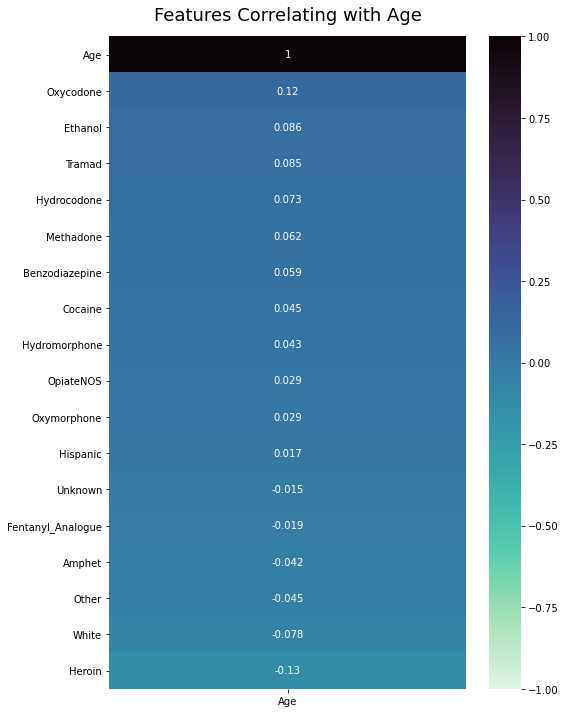

In [36]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Age']].sort_values(by='Age', ascending=False), vmin=-1, vmax=1, annot=True, cmap='mako_r')
heatmap.set_title('Features Correlating with Age', fontdict={'fontsize':18}, pad=16);

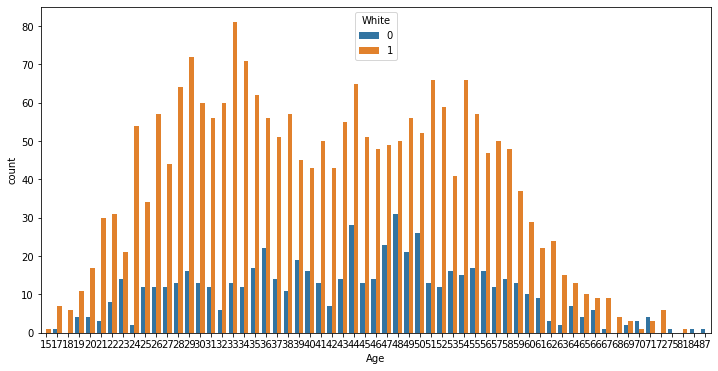

In [37]:
#visualize Race data using a countplot
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=train, hue='White')
plt.show()

### Multivariate Exploration

Text(0.5, 1.0, 'Average Age of Heroin Deaths by Race')

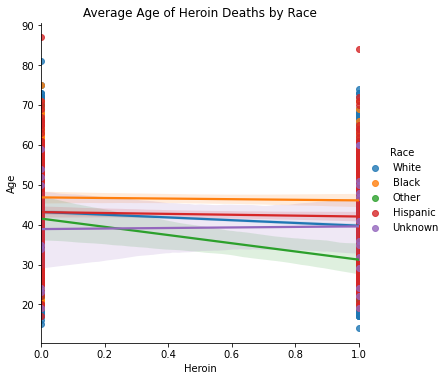

In [38]:
sns.lmplot(x='Heroin', y='Age', hue='Race', data=df)
plt.title('Average Age of Heroin Deaths by Race')

<hr style="border:2px solid black"> </hr>

In [39]:
df.Age.describe()

count    5105.000000
mean       41.964349
std        12.333035
min        14.000000
25%        32.000000
50%        42.000000
75%        52.000000
max        87.000000
Name: Age, dtype: float64

In [40]:
#create bins for age
df['age_bins'] = pd.cut(x=df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])

In [41]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,InjuryPlace,...,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,Hispanic,Other,Unknown,White,age_bins
0,14-0273,06/28/2014 12:00:00 AM,41,Male,White,HARTFORD,HARTFORD,Residence,substance,Residence,...,0,0,0,0,Accident,0,0,0,1,"(40, 50]"
1,13-0102,03/21/2013 12:00:00 AM,48,Male,Black,NORWALK,NORWALK,Hospital,Substance Abuse,Residence,...,0,0,0,0,Accident,0,0,0,0,"(40, 50]"
2,16-0165,03/13/2016 12:00:00 AM,30,Female,White,SANDY HOOK,DANBURY,Hospital,Substance Abuse,Unknown,...,0,0,0,1,Accident,0,0,0,1,"(20, 30]"
3,16-0208,03/31/2016 12:00:00 AM,23,Male,White,RYE,GREENWICH,Hospital,substance abuse,Residence,...,0,0,0,1,Accident,0,0,0,1,"(20, 30]"
4,13-0052,02/13/2013 12:00:00 AM,22,Male,Other,FLUSHING,GREENWICH,Hospital,Transdermal Absorption,Other,...,0,0,0,0,Accident,0,1,0,0,"(20, 30]"


<hr style="border:1px solid black"> </hr>

### Hypothesis Testing

Hypothesis 1: T-Test (cont vs discrete)
- $H_0$: There is a relationship between Age and Race (White) among drug overdose deaths
- $H_a$: There is not s relationship between Age and Race (White) among drug overdose deaths

In [42]:
#set alpha
alpha = .05

In [43]:
# sample size, must be more then 30 to meet assumption
train.Age.count(), train.White.count()

(2858, 2858)

In [44]:
#check variance
train.Age.var(), train.White.var()

#this shows not equal varient

(149.8752585634879, 0.17151102481646124)

In [45]:
#t-test on entire train set
t, p = stats.ttest_ind(train.Age,train.White, equal_var=False)
t,p

(179.4934639776462, 0.0)

In [46]:
if p < alpha:
    print(f'We calculate a t of {t:3f} and a statistical certainty p of {p:4f}')
    print(f'Because p {p:3f} < α  {alpha:3f}, we fail to reject our null hypothesis')
else:
    print(f'We reject our null hypothesis')

We calculate a t of 179.493464 and a statistical certainty p of 0.000000
Because p 0.000000 < α  0.050000, we fail to reject our null hypothesis


In [47]:
hypothesis_df = pd.DataFrame(data=[{
    'Hypothesis': '#1',
    'p-value': (round(p,4)),
    't-value': (round(t,3)),
    'r-value': 'N/A',
    'alpha': alpha,
    'Result': 'fail to reject $H_o$'
    }])

hypothesis_df

,Hypothesis,p-value,t-value,r-value,alpha,Result
0,#1,0.0,179.493,N/A,0.05,fail to reject $H_o$


_______________________________

Hypothesis 2: T-Test (cont vs discrete)
- $H_0$: There is a relationship between Age and Oxycodone drug overdose deaths
- $H_a$: There is not s relationship between Age and Oxycodone drug overdose deaths

In [48]:
# sample size, must be more then 30 to meet assumption
train.Age.count(), train.Oxycodone.count()

(2858, 2858)

In [49]:
#check variance
train.Age.var(), train.Oxycodone.var()

#this shows not equal varient

(149.8752585634879, 0.10189954914120247)

In [50]:
#t-test on entire train set
t, p = stats.ttest_ind(train.Age,train.Oxycodone, equal_var=False)
t,p

(182.4387259159486, 0.0)

In [51]:
if p < alpha:
    print(f'We calculate a t of {t:3f} and a statistical certainty p of {p:4f}')
    print(f'Because p {p:3f} < α  {alpha:3f}, we fail to reject our null hypothesis')
else:
    print(f'We reject our null hypothesis')

We calculate a t of 182.438726 and a statistical certainty p of 0.000000
Because p 0.000000 < α  0.050000, we fail to reject our null hypothesis


In [52]:
hypothesis_df = hypothesis_df.append(
    {
    'Hypothesis': '#2',
    'p-value': (round(p,4)),
    't-value': (round(t,4)),
    'r-value': 'N/A',
    'alpha': alpha,
    'Result': 'fail to reject $H_o$'},
    ignore_index= True
    )

hypothesis_df

,Hypothesis,p-value,t-value,r-value,alpha,Result
0,#1,0.0,179.4930,N/A,0.05,fail to reject $H_o$
1,#2,0.0,182.4387,N/A,0.05,fail to reject $H_o$


_____________________________

Hypothesis 3: T-Test (cont vs discrete)
- $H_0$: There is a relationship between Age and Heroin drug overdose deaths
- $H_a$: There is not a relationship between Age and Heroin drug overdose deaths

In [53]:
# sample size, must be more then 30 to meet assumption
train.Age.count(), train.Heroin.count()

(2858, 2858)

In [54]:
#check variance
train.Age.var(), train.Heroin.var()

#this shows not equal varient

(149.8752585634879, 0.25008444264060153)

In [55]:
#t-test on entire train set
t, p = stats.ttest_ind(train.Age,train.Heroin, equal_var=False)
t,p

(180.67697239575637, 0.0)

In [56]:
if p < alpha:
    print(f'We calculate a t of {t:3f} and a statistical certainty p of {p:4f}')
    print(f'Because p {p:3f} < α  {alpha:3f}, we fail to reject our null hypothesis')
else:
    print(f'We reject our null hypothesis')

We calculate a t of 180.676972 and a statistical certainty p of 0.000000
Because p 0.000000 < α  0.050000, we fail to reject our null hypothesis


In [57]:
hypothesis_df = hypothesis_df.append(
    {
    'Hypothesis': '#2',
    'p-value': (round(p,4)),
    't-value': (round(t,4)),
    'r-value': 'N/A',
    'alpha': alpha,
    'Result': 'fail to reject $H_o$'},
    ignore_index= True
    )

hypothesis_df

,Hypothesis,p-value,t-value,r-value,alpha,Result
0,#1,0.0,179.4930,N/A,0.05,fail to reject $H_o$
1,#2,0.0,182.4387,N/A,0.05,fail to reject $H_o$
2,#2,0.0,180.6770,N/A,0.05,fail to reject $H_o$


________________________________________________________

Hypothesis 4: $X^2$ Test (discrete vs discrete)
- $H_0$: There is a relationship between Heroin and Oxycodone drug overdose deaths
- $H_a$: There is not a relationship between Heroin and Oxycodone drug overdose deaths

In [58]:
#pearsons correlation on entire train set
#number of rows
n = train.shape[0] 

#degrees of freedom- how much the data can vary
deg_f = n-2 

#confidence interval (!)
conf_in = 0.95

alpha = 1- conf_in

In [59]:
x= train.Heroin
y= train.Oxycodone

In [60]:
r, p = stats.pearsonr(x,y)

In [61]:
print(f'We calculate a pearson r of {r:3f} and a statistical certainty p of {p:4f}')
print(f'Because p {p:4f} < α  {alpha:4f}, we can reject our null hypothesis')

We calculate a pearson r of -0.221287 and a statistical certainty p of 0.000000
Because p 0.000000 < α  0.050000, we can reject our null hypothesis


In [62]:
hypothesis_df = hypothesis_df.append(
    {
    'Hypothesis': '#4',
    'p-value': (round(p,4)),
    't-value': 'N/A',
    'r-value': (round(r,4)),
    'alpha': alpha,
    'Result': 'reject $H_o$'},
    ignore_index= True
    )

hypothesis_df

,Hypothesis,p-value,t-value,r-value,alpha,Result
0,#1,0.0,179.493,N/A,0.05,fail to reject $H_o$
1,#2,0.0,182.439,N/A,0.05,fail to reject $H_o$
2,#2,0.0,180.677,N/A,0.05,fail to reject $H_o$
3,#4,0.0,N/A,-0.2213,0.05,reject $H_o$


<hr style="border:2px solid black"> </hr>

# Modeling

In [63]:
#take a look at X_train dataframe
X_train.head()

,ID,Date,Sex,Race,ResidenceCity,DeathCity,Location,DescriptionofInjury,InjuryPlace,COD,...,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath,Hispanic,Other,Unknown,White
2570,17-0585,07/11/2017 12:00:00 AM,Female,White,SUFFIELD,SUFFIELD,Residence,Substance Abuse,Residence,Acute Intoxication due to the Combined Effects...,...,0,0,0,0,0,Accident,0,0,0,1
2415,17-0078,01/29/2017 12:00:00 AM,Female,White,COVENTRY,COVENTRY,Residence,Prescription Medicine Abuse,Residence,Acute Intoxication From the Combined Effects o...,...,0,1,1,0,0,Accident,0,0,0,1
4289,18-0792,10/07/2018 12:00:00 AM,Male,White,STRATFORD,STRATFORD,Residence,Substance Abuse,Residence,Acute Intoxication From the Combined Effects o...,...,0,0,0,0,1,Accident,0,0,0,1
4620,17-0093,02/03/2017 12:00:00 AM,Male,White,WINCHESTER,WINCHESTER,Residence,SUBSTANCE ABUSE,Residence,"ACUTE HEROIN, FENTANYL AND COCAINE TOXICITIES,...",...,0,0,0,0,0,Accident,0,0,0,1
2996,17-0016,01/05/2017 12:00:00 AM,Male,White,DANBURY,DANBURY,Residence,Substance Abuse,Residence,Acute Fentanyl Intoxication,...,0,0,0,0,0,Accident,0,0,0,1


## Create Baseline

In [64]:
#create a baseline
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [65]:
# 1. Predict assessed_value_pred_mean

#predicted mean will be the mean of value_assessed column
age_pred_mean = y_train['Age'].mean()
#new column created
y_train['age_pred_mean'] = age_pred_mean
y_validate['age_pred_mean'] = age_pred_mean

In [66]:
y_train.head()

,Age,age_pred_mean
2570,27,41.907628
2415,61,41.907628
4289,24,41.907628
4620,47,41.907628
2996,23,41.907628


In [67]:
# 2. RMSE of value_assessed_pred_mean

#root mean squared error of the predicted mean
rmse_train = mean_squared_error(y_train.Age, y_train.age_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.Age, y_validate.age_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 3), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 3))

RMSE using Mean
Train/In-Sample:  12.24 
Validate/Out-of-Sample:  12.536


In [68]:
#create a dataframe to make data easier to visualize/understand
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_train': (round(rmse_train,3)),
    'rmse_validate': (round(rmse_validate,3)),
    'rmse_test': 'N/A',
    'r^2': (round(explained_variance_score(y_validate.Age, y_validate.age_pred_mean),3))}])

metric_df
#we now have out baseline model to work off of

,model,rmse_train,rmse_validate,rmse_test,r^2
0,mean_baseline,12.24,12.536,N/A,0.0


___________________________________

## Linear Regression Model

In [69]:
#set X_train to drivers only
#we do not want to include all columns in this because it could cause overfitting
#these two features have the highest correlation
drivers_train = X_train[['Oxycodone', 'Heroin']]

#set X_validate_scaled to drivers only
drivers_validate= X_validate[['Oxycodone', 'Heroin']]

#set X_test_scaled to drivers only
drivers_test= X_test[['Oxycodone', 'Heroin']]

In [70]:
#create the model 
lm = LinearRegression(normalize=True)

#fit
lm.fit(drivers_train, y_train.Age)

LinearRegression(normalize=True)

In [71]:
# predict train
y_train['age_pred_lm'] = lm.predict(drivers_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Age, y_train.age_pred_lm)**(1/2)

# predict validate
y_validate['age_pred_lm'] = lm.predict(drivers_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Age, y_validate.age_pred_lm)**(1/2)

In [72]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  12.118785439335973 
Validation/Out-of-Sample:  12.380931745188388


In [73]:
#create visual to see baseline vs LinearRegression model
metric_df = metric_df.append(
    {
    'model': 'OLS',
    'rmse_train': (round(rmse_train,3)),
    'rmse_validate': (round(rmse_validate,3)),
    'rmse_test': 'N/A',
    'r^2': (round(explained_variance_score(y_validate.Age, y_validate.age_pred_lm),3))}, ignore_index=True)

metric_df

,model,rmse_train,rmse_validate,rmse_test,r^2
0,mean_baseline,12.240,12.536,N/A,0.000
1,OLS,12.119,12.381,N/A,0.024


________________________________

### LassoLars Model

In [74]:
# create the model object
lars = LassoLars(alpha= 2)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(drivers_train, y_train.Age)

# predict train
y_train['age_pred_lars'] = lars.predict(drivers_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Age, y_train.age_pred_lars)**(1/2)

# predict validate
y_validate['age_pred_lars'] = lars.predict(drivers_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Age, y_validate.age_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  12.240213149907696 
Validation/Out-of-Sample:  12.535506516301341


In [75]:
#shows baseline vs LinearRegression vs LassoLars
metric_df = metric_df.append(
    {
    'model': 'LassoLars (alpha 2)',
    'rmse_train': (round(rmse_train,3)),
    'rmse_validate': (round(rmse_validate,3)),
    'rmse_test': 'N/A',
    'r^2': (round(explained_variance_score(y_validate.Age, y_validate.age_pred_lars),3))}, ignore_index=True)

metric_df

,model,rmse_train,rmse_validate,rmse_test,r^2
0,mean_baseline,12.240,12.536,N/A,0.000
1,OLS,12.119,12.381,N/A,0.024
2,LassoLars (alpha 2),12.240,12.536,N/A,0.000


___________________________________________

In [76]:
# create the model object
glm = TweedieRegressor(power=1, alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(drivers_train, y_train.Age)

# predict train
y_train['age_pred_glm'] = glm.predict(drivers_train)

# evaluate: rmse
rmse_train = (mean_squared_error(y_train.Age, y_train.age_pred_glm)**(1/2))

# predict validate
y_validate['age_pred_glm'] = glm.predict(drivers_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Age, y_validate.age_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", (round(rmse_train,2)), 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  12.12 
Validation/Out-of-Sample:  12.383584360786044


In [77]:
#compares all four models
metric_df = metric_df.append(
    {
    'model': 'TweedieRegresson (power 1, alpha 2)',
    'rmse_train': (round(rmse_train,3)),
    'rmse_validate': (round(rmse_validate,3)),
    'rmse_test': 'N/A',
    'r^2': (round(explained_variance_score(y_validate.Age, y_validate.age_pred_glm),3))}, ignore_index=True)

metric_df

,model,rmse_train,rmse_validate,rmse_test,r^2
0,mean_baseline,12.240,12.536,N/A,0.000
1,OLS,12.119,12.381,N/A,0.024
2,LassoLars (alpha 2),12.240,12.536,N/A,0.000
3,"TweedieRegresson (power 1, alpha 2)",12.121,12.384,N/A,0.024


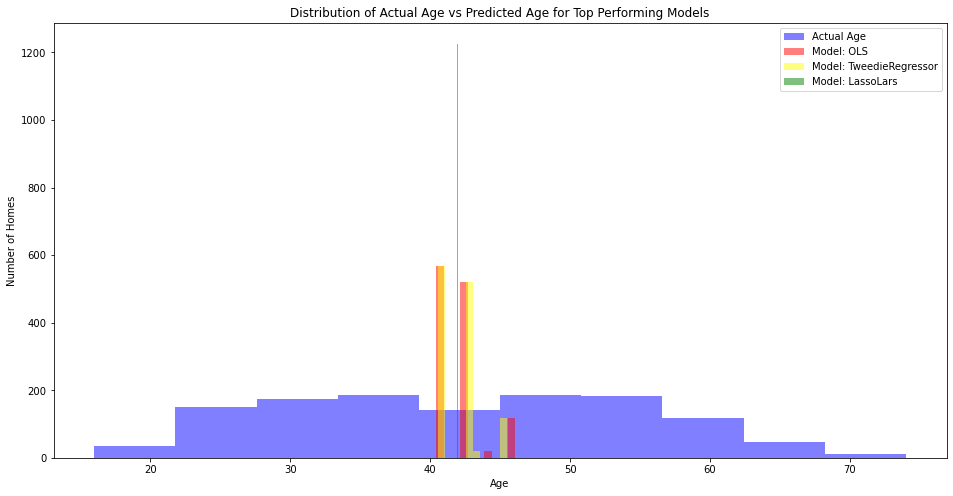

In [78]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.Age, color='blue', alpha=.5, label="Actual Age")
plt.hist(y_validate.age_pred_lm, color='red', alpha=.5, label="Model: OLS")
plt.hist(y_validate.age_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.age_pred_lars, color='green', alpha=.5, label="Model: LassoLars")
plt.xlabel("Age")
plt.ylabel("Number of Homes")
plt.title("Distribution of Actual Age vs Predicted Age for Top Performing Models")
plt.legend()
plt.show()

____________________________

### Use Test set on Best Performing Model

In [79]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['age_pred_lm'] = lm.predict(drivers_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Age, y_test.age_pred_lm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  12.087717914301749


In [80]:
#compares all four models
metric_df = metric_df.append(
    {
    'model': 'OLS on Test set',
    'rmse_train': 'N/A',
    'rmse_vaidate': 'N/A',
    'rmse_test': (round(rmse_test,3)),
    'r^2': (round(explained_variance_score(y_test.Age, y_test.age_pred_lm),3))}, ignore_index=True)

metric_df

,model,rmse_train,rmse_validate,rmse_test,r^2,rmse_vaidate
0,mean_baseline,12.24,12.536,N/A,0.000,NaN
1,OLS,12.119,12.381,N/A,0.024,NaN
2,LassoLars (alpha 2),12.24,12.536,N/A,0.000,NaN
3,"TweedieRegresson (power 1, alpha 2)",12.121,12.384,N/A,0.024,NaN
4,OLS on Test set,N/A,NaN,12.088,0.041,N/A


### Takeaways from Modeling:
- OLS model performs better than the baseline and other predictive models
- The drop of between train and validate was not significant

_____________________________________________

## Final Takeaways and Next Steps:

- OLS Model performed the best, outperforming the baseline and other models
- Average age does not appear to change significantly
- All $H_0$ were reject with the exception of one

<br>

- With more time, I would like to:
    - continue looking into my Time Series project 
        - Does average age change over time?
        - Do Heroin deaths increase over time?